## **LeNet Implementationa**

In [29]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [30]:
## Load Dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [31]:
## Shape of X_train,y_train
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [32]:
## shape of X_test,y_test
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

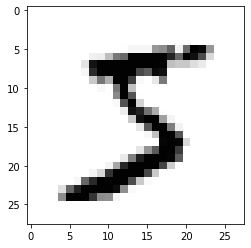

In [33]:
## Show Image
plt.imshow(X_train[0],cmap="Greys")

In [34]:
## Preprocessing the data
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape = (28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [35]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [36]:
## Model Building 
model =keras.models.Sequential([
  keras.layers.Conv2D(6,5, strides=(1,1), activation="tanh", input_shape=[28,28,1]),
  keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),
  keras.layers.Conv2D(16,5,strides=(1,1),activation='tanh'),
  keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),
  keras.layers.Flatten(), 
  keras.layers.Dense(units=120,activation='tanh'),
  keras.layers.Flatten(),
  keras.layers.Dense(units=84,activation='tanh'),
  keras.layers.Dense(units=10,activation='softmax'),
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)              

In [38]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.0,decay=0.0),metrics=['accuracy'])

In [39]:
model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
469/469 [==============================] - 19s 39ms/step - loss: 0.7270 - accuracy: 0.7985
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1833 - accuracy: 0.9459
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1166 - accuracy: 0.9663
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0868 - accuracy: 0.9753
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0708 - accuracy: 0.9790
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0507 - accuracy: 0.9849
Epoch 8/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0463 - accuracy: 0.9865
Epoch 9/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0421 - accuracy: 0.9877
Epoch 10/10
469/469 [==============================] - 18s 39ms/step - loss: 0.035

7


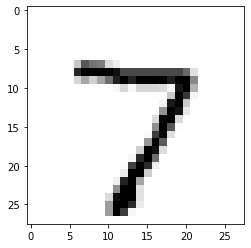

In [40]:
image_index = 0
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0419 - accuracy: 0.9867


[0.041861243546009064, 0.9866999983787537]